# Analýza hlavních komponent

## Úkol

- V datasetu Portland Housing Prices/Sales Jul 2020 - Jul 2021 zjistěte, jestli je zde problém multikolinearity.
- Proveďte analyzu hlavních komponent
- Vytvořte lineární model z PCA a model porovnejte s minulým cvičením

# Načtení dat

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
data = pd.read_csv("../dataset/portland_filtered.csv", sep=';')

# Analýza
- zobrazte data
- vyřešte NaN hodnoty
- zobrazte základní statistiky dat
- zobrazte korelační matici

In [ ]:
# Zobrazení prvních řádků
data.head()

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


In [ ]:
# Řešení NaN hodnot
data = data.dropna()

In [ ]:
# Základní statistiky
print(data.describe())

        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


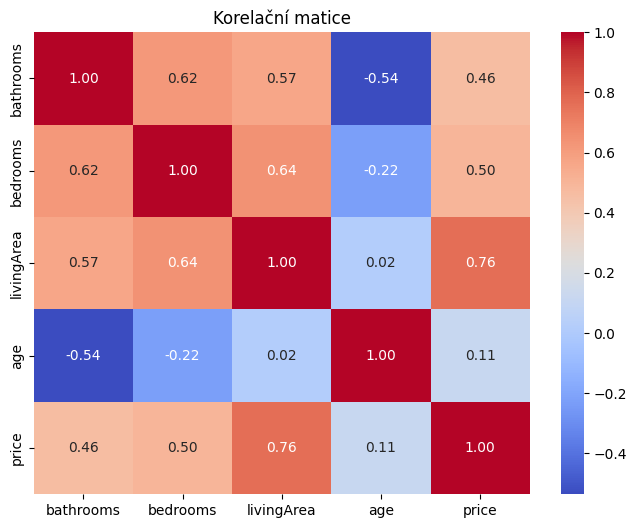

In [ ]:
# Korelační matice
import seaborn as sns
import sys
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Korelační matice")
plt.show()

# Příprava dat
- vyberte X promenné bathrooms', 'bedrooms', 'livingArea','age','price'
- proměnné standardizujte

In [ ]:
# Výběr proměnných
X = data[['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']]

In [ ]:
# Standardizace
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Zobrazte VIF pro každou proměnnou

In [ ]:
# Výpočet VIF s použitím statsmodels
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("VIF hodnoty:")
print(vif_data)

NameError: name 'variance_inflation_factor' is not defined

# PCA
- Proveďte PCA
- zobrazte korelační matici

In [ ]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Podíl vysvětlené variance hlavními komponentami:")
print(explained_variance)

Podíl vysvětlené variance hlavními komponentami:
[0.56642342 0.26245728 0.08512934 0.04495186 0.0410381 ]


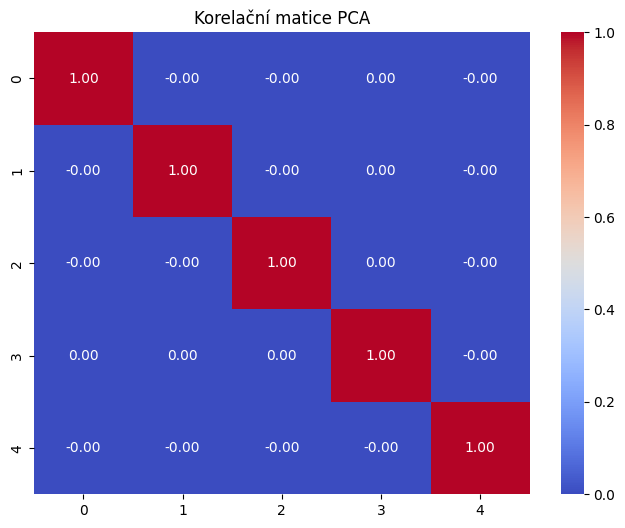

In [ ]:
# Korelační matice PCA komponent
import numpy as np


plt.figure(figsize=(8,6))
sns.heatmap(np.corrcoef(X_pca.T), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Korelační matice PCA")
plt.show()

# Lineární model
- Vytvořte a natrénujte Lineární model pro PCA proměnné
- Zobrazte R2 a RMSE

In [ ]:
# Lineární model na základě PCA
num_components = 3  # Vybereme 3 hlavní komponenty
X_pca_reduced = X_pca[:, :num_components]

y = data['price']

model = LinearRegression()
model.fit(X_pca_reduced, y)
y_pred = model.predict(X_pca_reduced)

In [ ]:
# Vyhodnocení modelu
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'R2: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R2: 0.9122
RMSE: 50782.7938
